# Data and Visualization
###                                                                                                                                         Dhananjay Arora

# INTRODUCTION

Machine learning, these days is not only machine which is learning from the past. It started with the pattern recognition and computers learning on its own without the need of being explicitly programmed. But now, researchers want to computer to learn from data and perform tasks on its own. Some examples are:
- Self driving Google car
- Online recommendation offers as offers from Netflix
- Fraud detection

Only should know all mathematical concepts thoroughly in order to implement a good machine learning algorithm successfully.

In machine learning and statistics, **classification** is the problem of identifying to which of a set of categories (sub-populations) a new observation belongs, on the basis of a training set of data containing observations (or instances) whose category membership is known.

Firstly, data is fetched from a file; then pre-processing is done (transformation of raw data into understandable format), in which data is cleaned and important feature values are also taken into consideration etc. After that comes the most important task which is data visualization. It is important because large data means nothing unless some graphs are plotted based on that and some visualization is done.
After that comes the preliminary observation; which says, what is being understood or concluded based on the tasks performed before.

##  Classification

## a) Introduction of data for Classification & source

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

There is a dataset: 
bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

Attribute Information:
Input variables:

**bank client data:**

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

**related with the last contact of the current campaign:**

8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**other attributes:**

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**social and economic context attributes**

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

**Source**
[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

## b) Reading the data

- The data is present in a comma separated value file. Fetching the records from the CSV file.
- Header information is there in the CSV file.

In [17]:
data_columns=['age','job','marital','education','default','housing','loan','contact','month','day_of_week','duration','campaign','pdays','previous','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','y']
complete_data= pd.read_csv("C:\\Users\\arora\\Documents\\bank-additional\\bank-additional-full.csv")

## c) Preprocessing of the data

Checking the data type and file storage size as below:

In [18]:
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

Printing count of rows and columns as below:

In [19]:
complete_data.shape

(41188, 21)

It can be seen that there are 41188 rows and 21 feature values.

Performing some basic mathematical function on data set using describe() as below:

In [20]:
complete_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Listing the top 10 rows as below:

In [21]:
complete_data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Listing the last 10 rows as below:

In [22]:
complete_data.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41179,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


Checking whether the data contains any null value as below:

In [23]:
complete_data.isnull().sum().sort_values(ascending=False)

y                 0
day_of_week       0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
duration          0
nr.employed       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
age               0
dtype: int64

There is no null value in the dataset as it can be seen above.

Now, let's change value of output variable 'y' that is, "has the client subscribed a term deposit?"

Making no = 0 and 1 = yes.

In [24]:
complete_data['y'] = complete_data['y'].map({'no' : 0, 'yes' : 1})

Extracting the important feature list as below:

In [25]:
important_cols=complete_data.columns.tolist()
feature_list=important_cols[:9] + important_cols[11:]
print(feature_list)

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


## d) Visualization of the data

Now we will vizualize the dataset.

**Plotting the Distribution Curves for the feature variables as below:**

C:\Users\arora\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


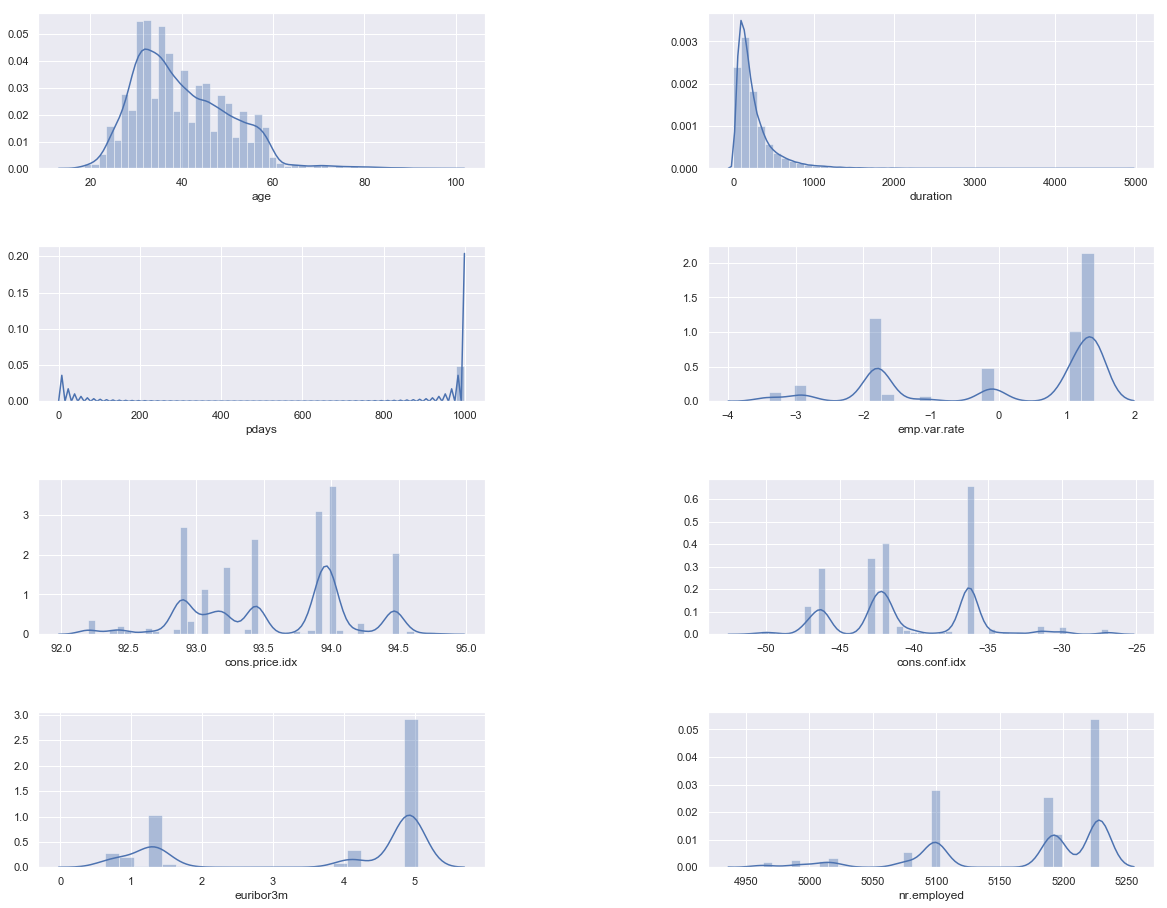

In [26]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html - Reference
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)
distribution_plot_list=['age','duration','pdays','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(1, 9):
    ax = fig.add_subplot(5,2, i)
    ax = sns.distplot(complete_data[distribution_plot_list[(i-1)]])

From the above image, it can be seen that mostly the age of customers is between 20 and 60. 

Also, comsumer price index (monthly) is between 92.0 and 95.0

Since the number of pdays mostly is 999, that means most of the customers are new customers. 

Employment variation rate (quarterly indicator) value varies from -4 to 2.

Almost all individual call duration was between 0 and 1000 seconds.

Consumer confidence index (monthly indicator) value lies between -50 and -25 mostly.

Euribor 3 month rate - daily indicator mostly has value as 5.

Number of employees - quarterly indicator value varies from 4950 to 5250 mostly.

**Below is the correlation matrix**

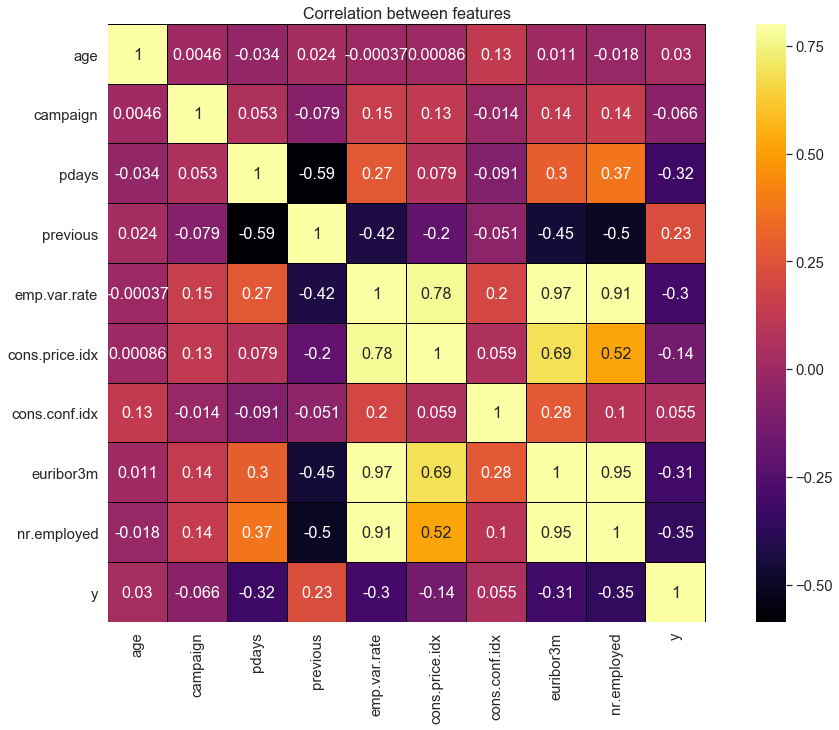

In [27]:
correlation_matrix=complete_data[feature_list].corr()
sns.set(font_scale=1.35)
plt.figure(figsize=(18, 11))

sns.heatmap(correlation_matrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='inferno',linecolor="black")
plt.title('Correlation between features');

Considering the above feature values, Number of contacts performed before this campaign and for this client is more related to client subscribing a term deposit as compared to other relations.

**Below is the bar-plot for client subscribing a term deposit vs his/her age**

C:\Users\arora\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


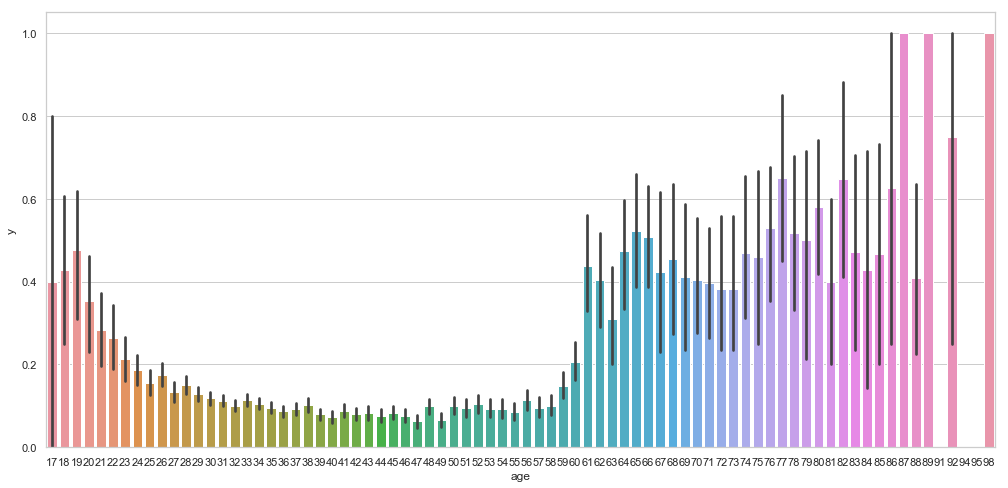

In [28]:
sns.set(style="whitegrid")
plt.figure(figsize=(17,8))
ax = sns.barplot(x="age", y="y", data=complete_data)

From the above bar-plot, it can be observed that major range of people who do not subscribe to the term deposit plan have age between 25 and 60. Elderly people subscribe the most to this plan.

Below is the bar plot for client subscribing a term deposit VS number of contacts performed during this campaign and for this client:

C:\Users\arora\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


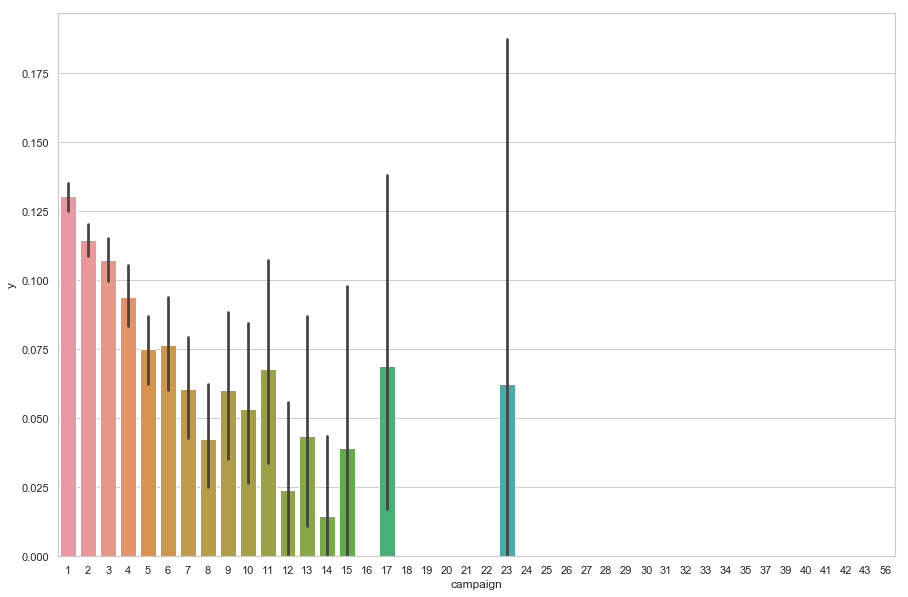

In [29]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,10))
ax = sns.barplot(x="campaign", y="y", data=complete_data)

Most people bought the plan when the number of contacts performed during this campaign and for this client was 1. (observed from above figure)

Below is the bar plot for client subscribing a term deposit VS type of job

C:\Users\arora\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


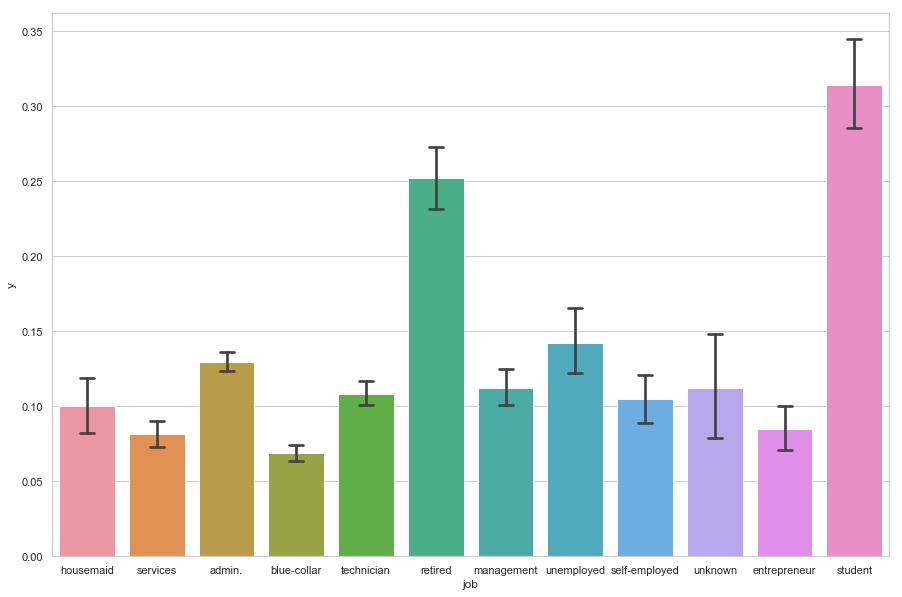

In [30]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="job", y="y", data=complete_data, capsize=.2)

This above plot shows that students tend to subscribe more to the term-deposit plan and second come the retired people; whereas least term-deposit plans are subscribed by blue-collar job people.

Below is the bar plot for client subscribing a term deposit VS their marital status:

C:\Users\arora\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


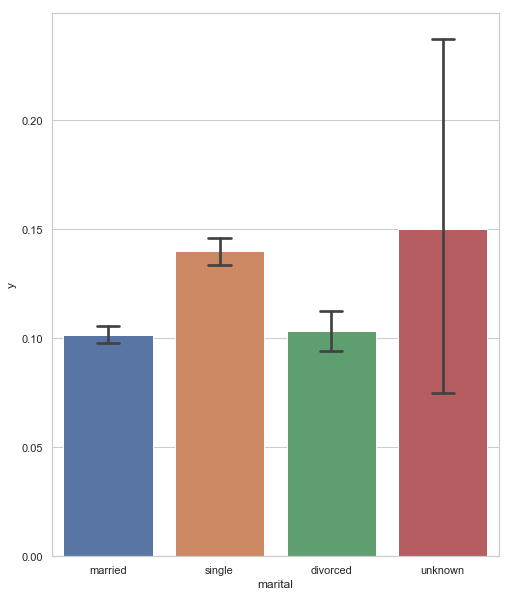

In [31]:
plt.figure(figsize=(8,10))
ax = sns.barplot(x="marital", y="y", data=complete_data, capsize=.2)

Mostly of the clients who have subscribed to term-deposit have not disclosed their marital status.
Second number is of clients who are single.

Below is the bar plot for client subscribing a term deposit VS education level:

C:\Users\arora\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


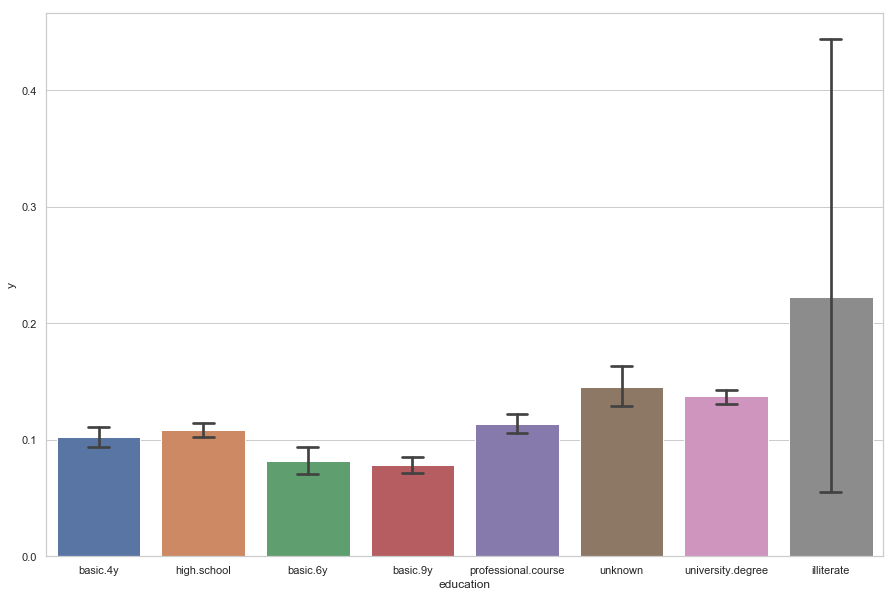

In [32]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="education", y="y", data=complete_data, capsize=.2)

Most clients who subscribe to this term-deposit plan are illiterate and least clients are those who have had only 9 years of education.

Below is the bar plot for client subscribing a term deposit VS clients having credit in default:

C:\Users\arora\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


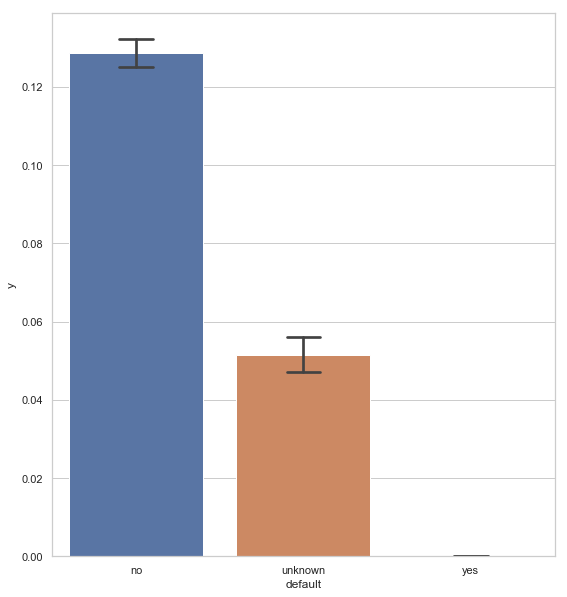

In [33]:
plt.figure(figsize=(9,10))
ax = sns.barplot(x="default", y="y", data=complete_data, capsize=.2)

Most of the plans are bought by clients who have no credit in default.(seen from above plot)

Below is the bar plot for client subscribing a term deposit VS last contact month of year:

C:\Users\arora\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


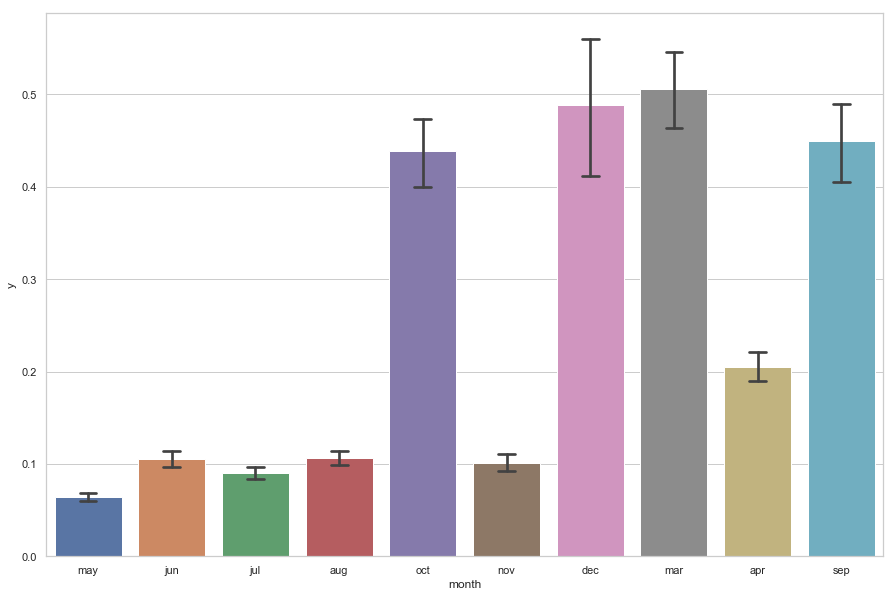

In [34]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x="month", y="y", data=complete_data, capsize=.2)

Most term-deposits were subscribed in March, December, September and October(seen from plot above).

Below is the bar plot for client subscribing a term deposit VS the last contact day of the week:

C:\Users\arora\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


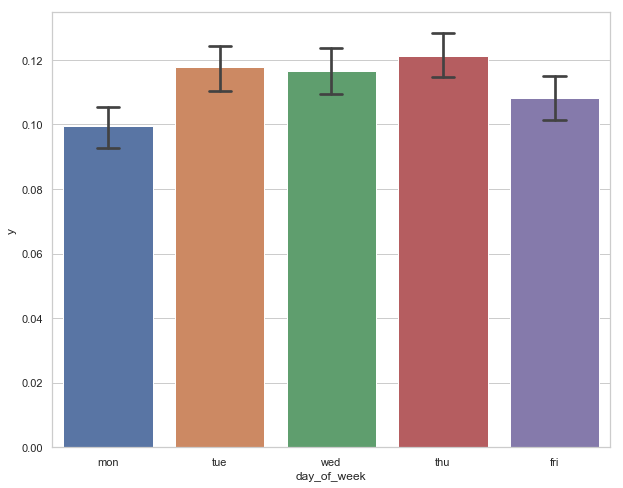

In [35]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x="day_of_week", y="y", data=complete_data, capsize=.2)

It can be observed from image above is that most of the term deposit were subscribed Thursdays and least on Mondays.

Below is the bar plot for client subscribing a term deposit VS outcome of the previous marketing campaign:

C:\Users\arora\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


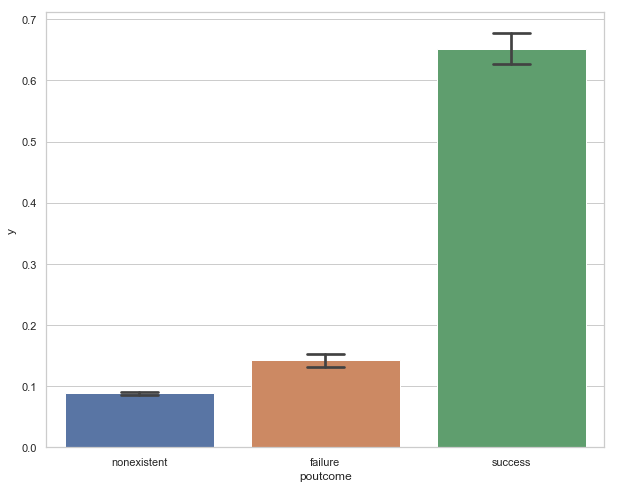

In [36]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x="poutcome", y="y", data=complete_data, capsize=.2)

In most cases, the outcome of the previous marketing campaign was success for those who subscribed to term deposit.

Below is the bar plot for client subscribing a term deposit VS Contact communication type:

C:\Users\arora\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


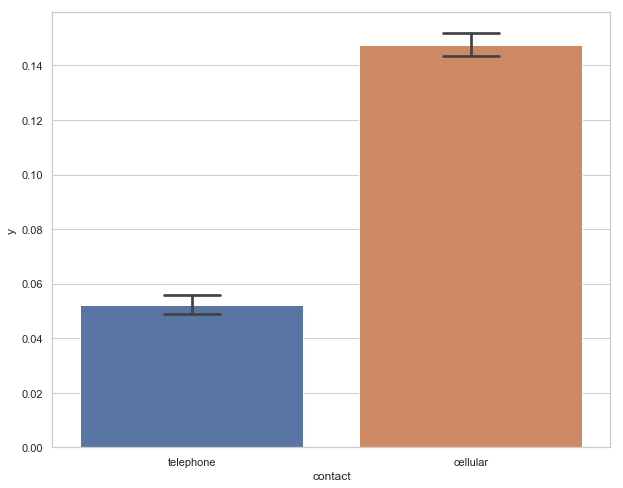

In [37]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x="contact", y="y", data=complete_data, capsize=.2)

It can be seen that most of the communication was cellular when a term deposit was subscribed.

## e) Preliminary observation

Below is the list of observations from the classification data provided.

Most clients who subscribed to the plan were:
- Elderly people (checked from age plot)
- when the number of contacts performed during this campaign and for this client was 1 (one)
- Students and retired clients
- Clients having no credit in default

Also, it was observed that most term-deposits were subscribed:
- in March, December, September and October months
- on Thursdays and least on Mondays
- when most of the communication was cellular.

Some other observations were also there and are listed above along with their plots.

# CONCLUSION

About 80% of the time was of the data scientists is usually spent in fetching and cleaning the data, which is known as data preprocessing and data scientists spend lesser time (20%) on actual working on data, that is, applying the algorithms to visualize it. 
To visualize the data, I got to know about some more python libraries which I did not know before like seaborn. I also got to learn scipy library which is used for scientific and technical computing.

# REFERENCES

[1] S. Moro, P. Cortez and P. Rita. "A Data-Driven Approach to Predict the Success of Bank Telemarketing", Decision Support Systems, Elsevier, 62:22-31, June 2014,
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

[2] Ian Goodfellow and Yoshua Bengio and Aaron Courville. "Deep Learning", MIT Press, 2016, http://www.deeplearningbook.org

[3] "Statistical classification”: From Wikipedia, the free encyclopedia, from https://en.wikipedia.org/wiki/Statistical_classification

[4] Hunter, J. D. "Matplotlib: A 2D graphics environment",Computing In Science & Engineering, IEEE COMPUTER SOC, 9, 90-95 (2007), https://matplotlib.org/tutorials/introductory/sample_plots.html

[5] Travis E, Oliphant. A guide to NumPy, USA: Trelgol Publishing, (2006), http://www.numpy.org/

[6] Wes McKinney. Data Structures for Statistical Computing in Python, Proceedings of the 9th Python in Science Conference, 51-56 (2010), http://pandas.pydata.org/pandas-docs/version/0.15.2/generated/pandas.DataFrame.replace.html
